> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate TMDb movie data


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

  > This project will examine dataset from The Movie Database (TMDb) API, which contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. In particular, we will be trying to find trends about being a successful moovie.


   ## Posing Questions
   The following analysis will take a look on the following questions:
   >  <p>Which genres are most popular from year to year? </p>
   >  <p>What kinds of properties are associated with movies that have high revenues?</p>


At first, the needed libraries will be imported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

First, we load the given data and take a look on the over all information

In [2]:
movie=pd.read_csv('tmdb-movies.csv') 

We take a loo at the shape of the data and the info of each colunm

In [3]:
movie.shape

(10866, 21)

In [4]:
movie.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Now we know the basics of the data, and from the table we can see that there are some missing data in some of the columns.

Also, I want to take a look about the summary statistics

In [6]:
movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the table we can find out some odd values in runtime, budget and revenue. We will take a look in the later section

### Data Cleaning 
   #### 1. Trim down the size of the data

First, we check for duplicated movies based on ID.

In [7]:
movie.id.duplicated().sum()

1

In [8]:
m1=movie.drop_duplicates("id")
m1.shape

(10865, 21)

Then, we drop the columns that we are not going to use.

In [9]:
m1.drop(['id','imdb_id','original_title','overview','tagline','release_date','keywords','budget','homepage','revenue'],axis = 1 ,inplace=True)
m1.shape

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(10865, 11)

In [10]:
m1.head(2)

,popularity,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08


Then, I will rename the budget_adj and revenue_adj to make typing easier.

In [11]:
m1.rename(columns={'budget_adj':'budget','revenue_adj':'revenue'},inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [12]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
popularity              10865 non-null float64
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget                  10865 non-null float64
revenue                 10865 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1018.6+ KB


Then, we want to see what to do with the nulls in production companies. So, I pulled out the data with null to see if there is a specific group.

In [13]:
m1[m1.production_companies.isnull()].head(2)

,popularity,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
228,0.584363,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,Louie Psihoyos,90,Adventure|Documentary,NaN,36,7.8,2015,0.0,0.0
259,0.476341,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,Alex Zamm,84,TV Movie,NaN,10,7.6,2015,0.0,0.0


In [14]:
m1[m1.production_companies.isnull()].tail()

,popularity,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
10804,0.149259,Diane Keaton|Kristin Griffith|Mary Beth Hurt|R...,Woody Allen,93,Drama,NaN,35,6.3,1978,0.0,0.0
10806,0.138635,Lucille Billingsley|Zella Graham|Cal Harberts|...,Errol Morris,85,Documentary,NaN,12,5.9,1978,0.0,0.0
10816,0.064602,Eric Idle|John Halsey|Ricky Fataar|Neil Innes|...,Eric Idle|Gary Weis,76,Comedy,NaN,14,6.0,1978,0.0,0.0
10842,0.253437,Sterling Holloway|Junius Matthews|Sebastian Ca...,Wolfgang Reitherman,25,Animation|Family,NaN,12,7.9,1966,0.0,0.0
10853,0.163592,Michael Caine|Shelley Winters|Millicent Martin...,Lewis Gilbert,114,Comedy|Drama|Romance,NaN,26,6.2,1966,0.0,0.0


It seems like the movies without production companies don't have specific type. Since it is around 10% of the data, it's a waste to drop them, I will group them as others.

In [15]:
m1['production_companies'].fillna('other',inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [16]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
popularity              10865 non-null float64
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget                  10865 non-null float64
revenue                 10865 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1018.6+ KB


The nulls in the rest of the columns are less so I will just drop them.

In [17]:
m1.dropna(inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 11 columns):
popularity              10731 non-null float64
cast                    10731 non-null object
director                10731 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    10731 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
budget                  10731 non-null float64
revenue                 10731 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1006.0+ KB


Also, we need to separate cast, genres and production_companies to single vaule in each column.

In [19]:
m1.head(2)

,popularity,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08


In order to do that, I split the data into list first.

In [20]:
m1=m1.assign(cast=m1['cast'].str.split('|'))
m1=m1.assign(genres=m1['genres'].str.split('|'))
m1=m1.assign(production_companies=m1['production_companies'].str.split('|'))

In [21]:
m1.head(1)

,popularity,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
0,32.985763,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,1.379999e+08,1.392446e+09


Then, I create a function to do the job easier later.

In [22]:
def expand(df, lst_cols):
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create expand DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # revert the original index order
    res = res.sort_index()
    return res

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Which genres are most popular from year to year?

First I expand the genres columns to find the most popular genres each year.

In [23]:
q1=expand(m1,['genres'])
q1.head(2)

,budget,cast,director,popularity,production_companies,release_year,revenue,runtime,vote_average,vote_count,genres
0,1.379999e+08,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,32.985763,"[Universal Studios, Amblin Entertainment, Lege...",2015,1.392446e+09,124,6.5,5562,Action
0,1.379999e+08,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,32.985763,"[Universal Studios, Amblin Entertainment, Lege...",2015,1.392446e+09,124,6.5,5562,Adventure


Then, I group the data by release year and genres to find the most popular genre each year.

In [24]:
res=q1.groupby(['release_year','genres'])[['popularity']].mean().unstack(fill_value=0)
res.head(2)

popularity                                                      \
genres           Action Adventure Animation    Comedy     Crime Documentary   
release_year                                                                  
1960           0.590724  0.700981  0.000000  0.396000  0.346480         0.0   
1961           0.365913  0.767323  2.631987  0.679838  0.806519         0.0   

                                                                          \
genres           Drama    Family   Fantasy   Foreign   History    Horror   
release_year                                                               
1960          0.566305  0.278064  0.428247  0.194948  0.412364  0.591450   
1961          0.432233  0.755722  0.154073  0.113651  0.334463  0.254578   

                                                                              \
genres           Music   Mystery   Romance Science Fiction TV Movie Thriller   
release_year                                                                   
1960          0.423531  0.000000  0.541227        0.327905      0.0  0.81191   
1961          0.564749  0.712793  0.426036        0.274103      0.0  0.00000   

                                  
genres             War   Western  
release_year                      
1960          0.225863  0.567759  
1961          0.531184  0.210021

Then, I alter the index to make the data easier to analyze.

In [25]:
res=res.xs('popularity', axis=1, drop_level=True)
res.head(2)

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,0.590724,0.700981,0.000000,0.396000,0.346480,0.0,0.566305,0.278064,0.428247,0.194948,0.412364,0.591450,0.423531,0.000000,0.541227,0.327905,0.0,0.81191,0.225863,0.567759
1961,0.365913,0.767323,2.631987,0.679838,0.806519,0.0,0.432233,0.755722,0.154073,0.113651,0.334463,0.254578,0.564749,0.712793,0.426036,0.274103,0.0,0.00000,0.531184,0.210021


Since the data is from 1960 to 2015, I divide it into 7 groups based on the release year and change the index of it.

In [26]:
x=res.idxmax(axis=1)
x=x.groupby(x.index // 8).value_counts()
x=x.unstack()

In [27]:
x.index=(["1960-1967","1968-1975","1976-1983","1984-1991","1992-1999","2000-2007","2008-2015"])
x.head(2)

,Action,Adventure,Animation,Crime,Family,Fantasy,History,Music,Mystery,Science Fiction,Thriller,War,Western
1960-1967,NaN,1.0,4.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN
1968-1975,NaN,1.0,2.0,2.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN


To better visualed the data, I used pie chart to see how the favortie genre changed over year.

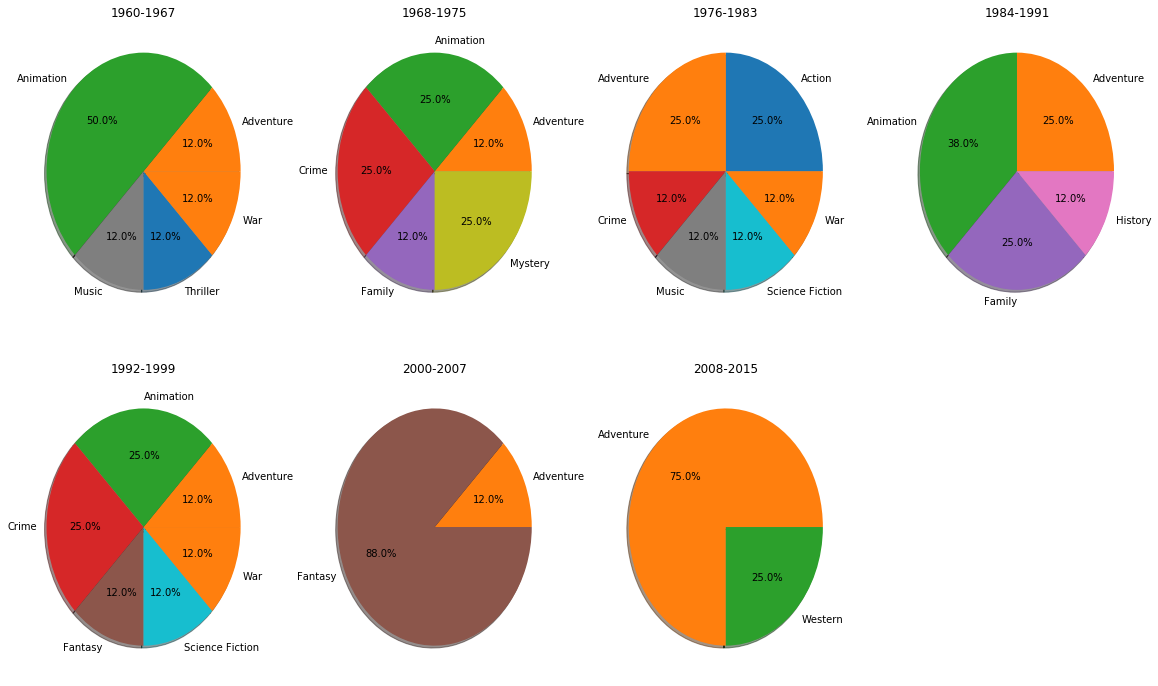

In [28]:
f, axes = plt.subplots(2,4, figsize=(20,12))
for i in range(len(x.index)):
    ax=axes[i // 4, i % 4]
    x.iloc[i].plot(kind='pie',ax=ax,title=x.index[i],shadow=True,autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '')
    ax.set(ylabel='')
f.delaxes(axes[1][3])

### What kinds of properties are associated with movies that have high revenue?

First, I will take out the columns I am going to use and split them into two groups based on the revenue.

In [29]:
q2=m1[['popularity','vote_count','vote_average','genres','budget','revenue',]]
q2.head(2)

,popularity,vote_count,vote_average,genres,budget,revenue
0,32.985763,5562,6.5,"[Action, Adventure, Science Fiction, Thriller]",1.379999e+08,1.392446e+09
1,28.419936,6185,7.1,"[Action, Adventure, Science Fiction, Thriller]",1.379999e+08,3.481613e+08


Here, I split the data by revenue and check if there is any data missing.

In [30]:
q2_high=q2.query('revenue >= (revenue.mean())')
q2_low=q2.query('revenue < (revenue.mean())')

len(q2_high.index)+len(q2_low.index) == len(q2.index)


True

After split the data, I plot histogram of the data to see the distribution of each group.

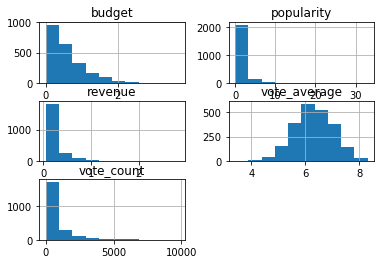

In [31]:
hist_high = q2_high.hist(bins=10)

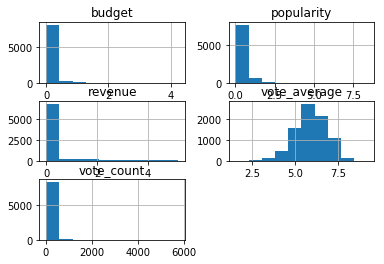

In [32]:
hist_low=q2_low.hist(bins=10)

To know better if there is correlation between these proerties and revenue. First, I create a table to compare betweem two groups.

In [33]:
pd.concat([q2_high.describe(), q2_low.describe()], axis=1, sort=False)

,popularity,vote_count,vote_average,budget,revenue,popularity,vote_count,vote_average,budget,revenue
count,2251.000000,2251.000000,2251.000000,2.251000e+03,2.251000e+03,8480.000000,8480.000000,8480.000000,8.480000e+03,8.480000e+03
mean,1.561609,774.459351,6.306975,5.846330e+07,2.290102e+08,0.411324,72.583137,5.873856,6.962096e+06,5.020870e+06
std,1.770656,1052.808195,0.733497,5.054017e+07,2.463801e+08,0.410016,162.765709,0.955539,1.640235e+07,1.136761e+07
min,0.010335,10.000000,3.400000,0.000000e+00,5.200779e+07,0.000188,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,0.669705,164.000000,5.800000,2.209561e+07,8.427391e+07,0.180195,15.000000,5.300000,0.000000e+00,0.000000e+00
50%,1.104816,379.000000,6.300000,4.500000e+07,1.427544e+08,0.315156,27.000000,5.900000,0.000000e+00,0.000000e+00
75%,1.839367,930.000000,6.800000,8.121861e+07,2.695242e+08,0.511845,65.000000,6.500000,5.816388e+06,8.692536e+05
max,32.985763,9767.000000,8.300000,3.683713e+08,2.827124e+09,8.411577,5754.000000,9.200000,4.250000e+08,5.200162e+07


Then, I use scatter plots to understand the relation between them more.

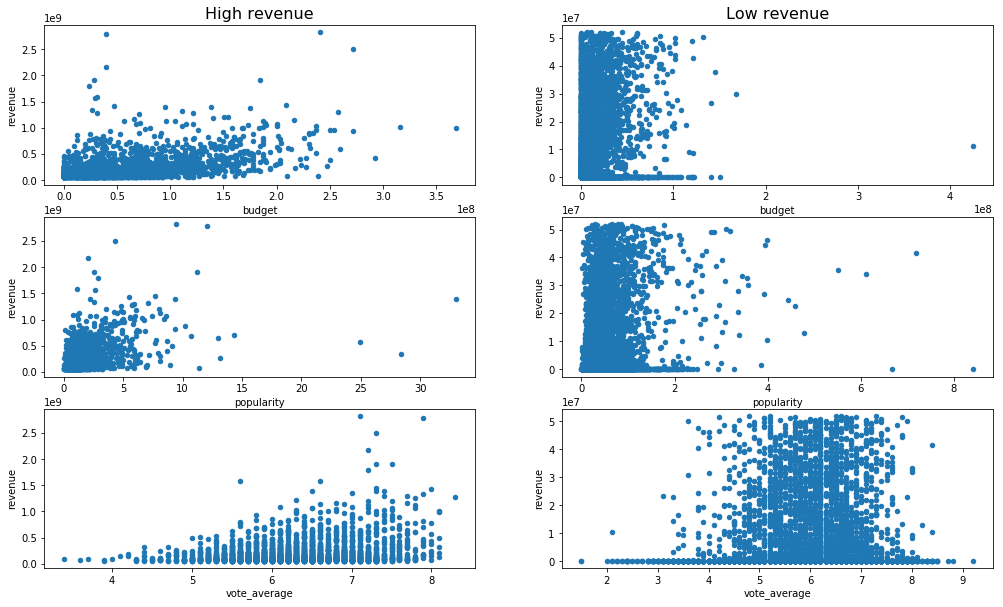

In [34]:
fig, axes= plt.subplots(3,2, figsize=(17,10))
c=0
d=0
for a in [q2_high, q2_low]:
    for b in ['budget','popularity','vote_average']:
        a.plot(x=b,y='revenue',kind='scatter',ax=axes[c%3,d]);
        c+=1
    d+=1
axes[0,0].set_title('High revenue', fontsize=16);
axes[0,1].set_title('Low revenue', fontsize=16);

Since the votes in low revenue movies are way less than high revenue movies, the population might be too small to see the correlation.

Also, I want to look whether there is a specific type of genre that can make more money. So I seperate the genres data one for each column.

In [35]:
q2_high=expand(q2_high,['genres'])
q2_low=expand(q2_low,['genres'])

Then, I use pie chart for visualizing the data.

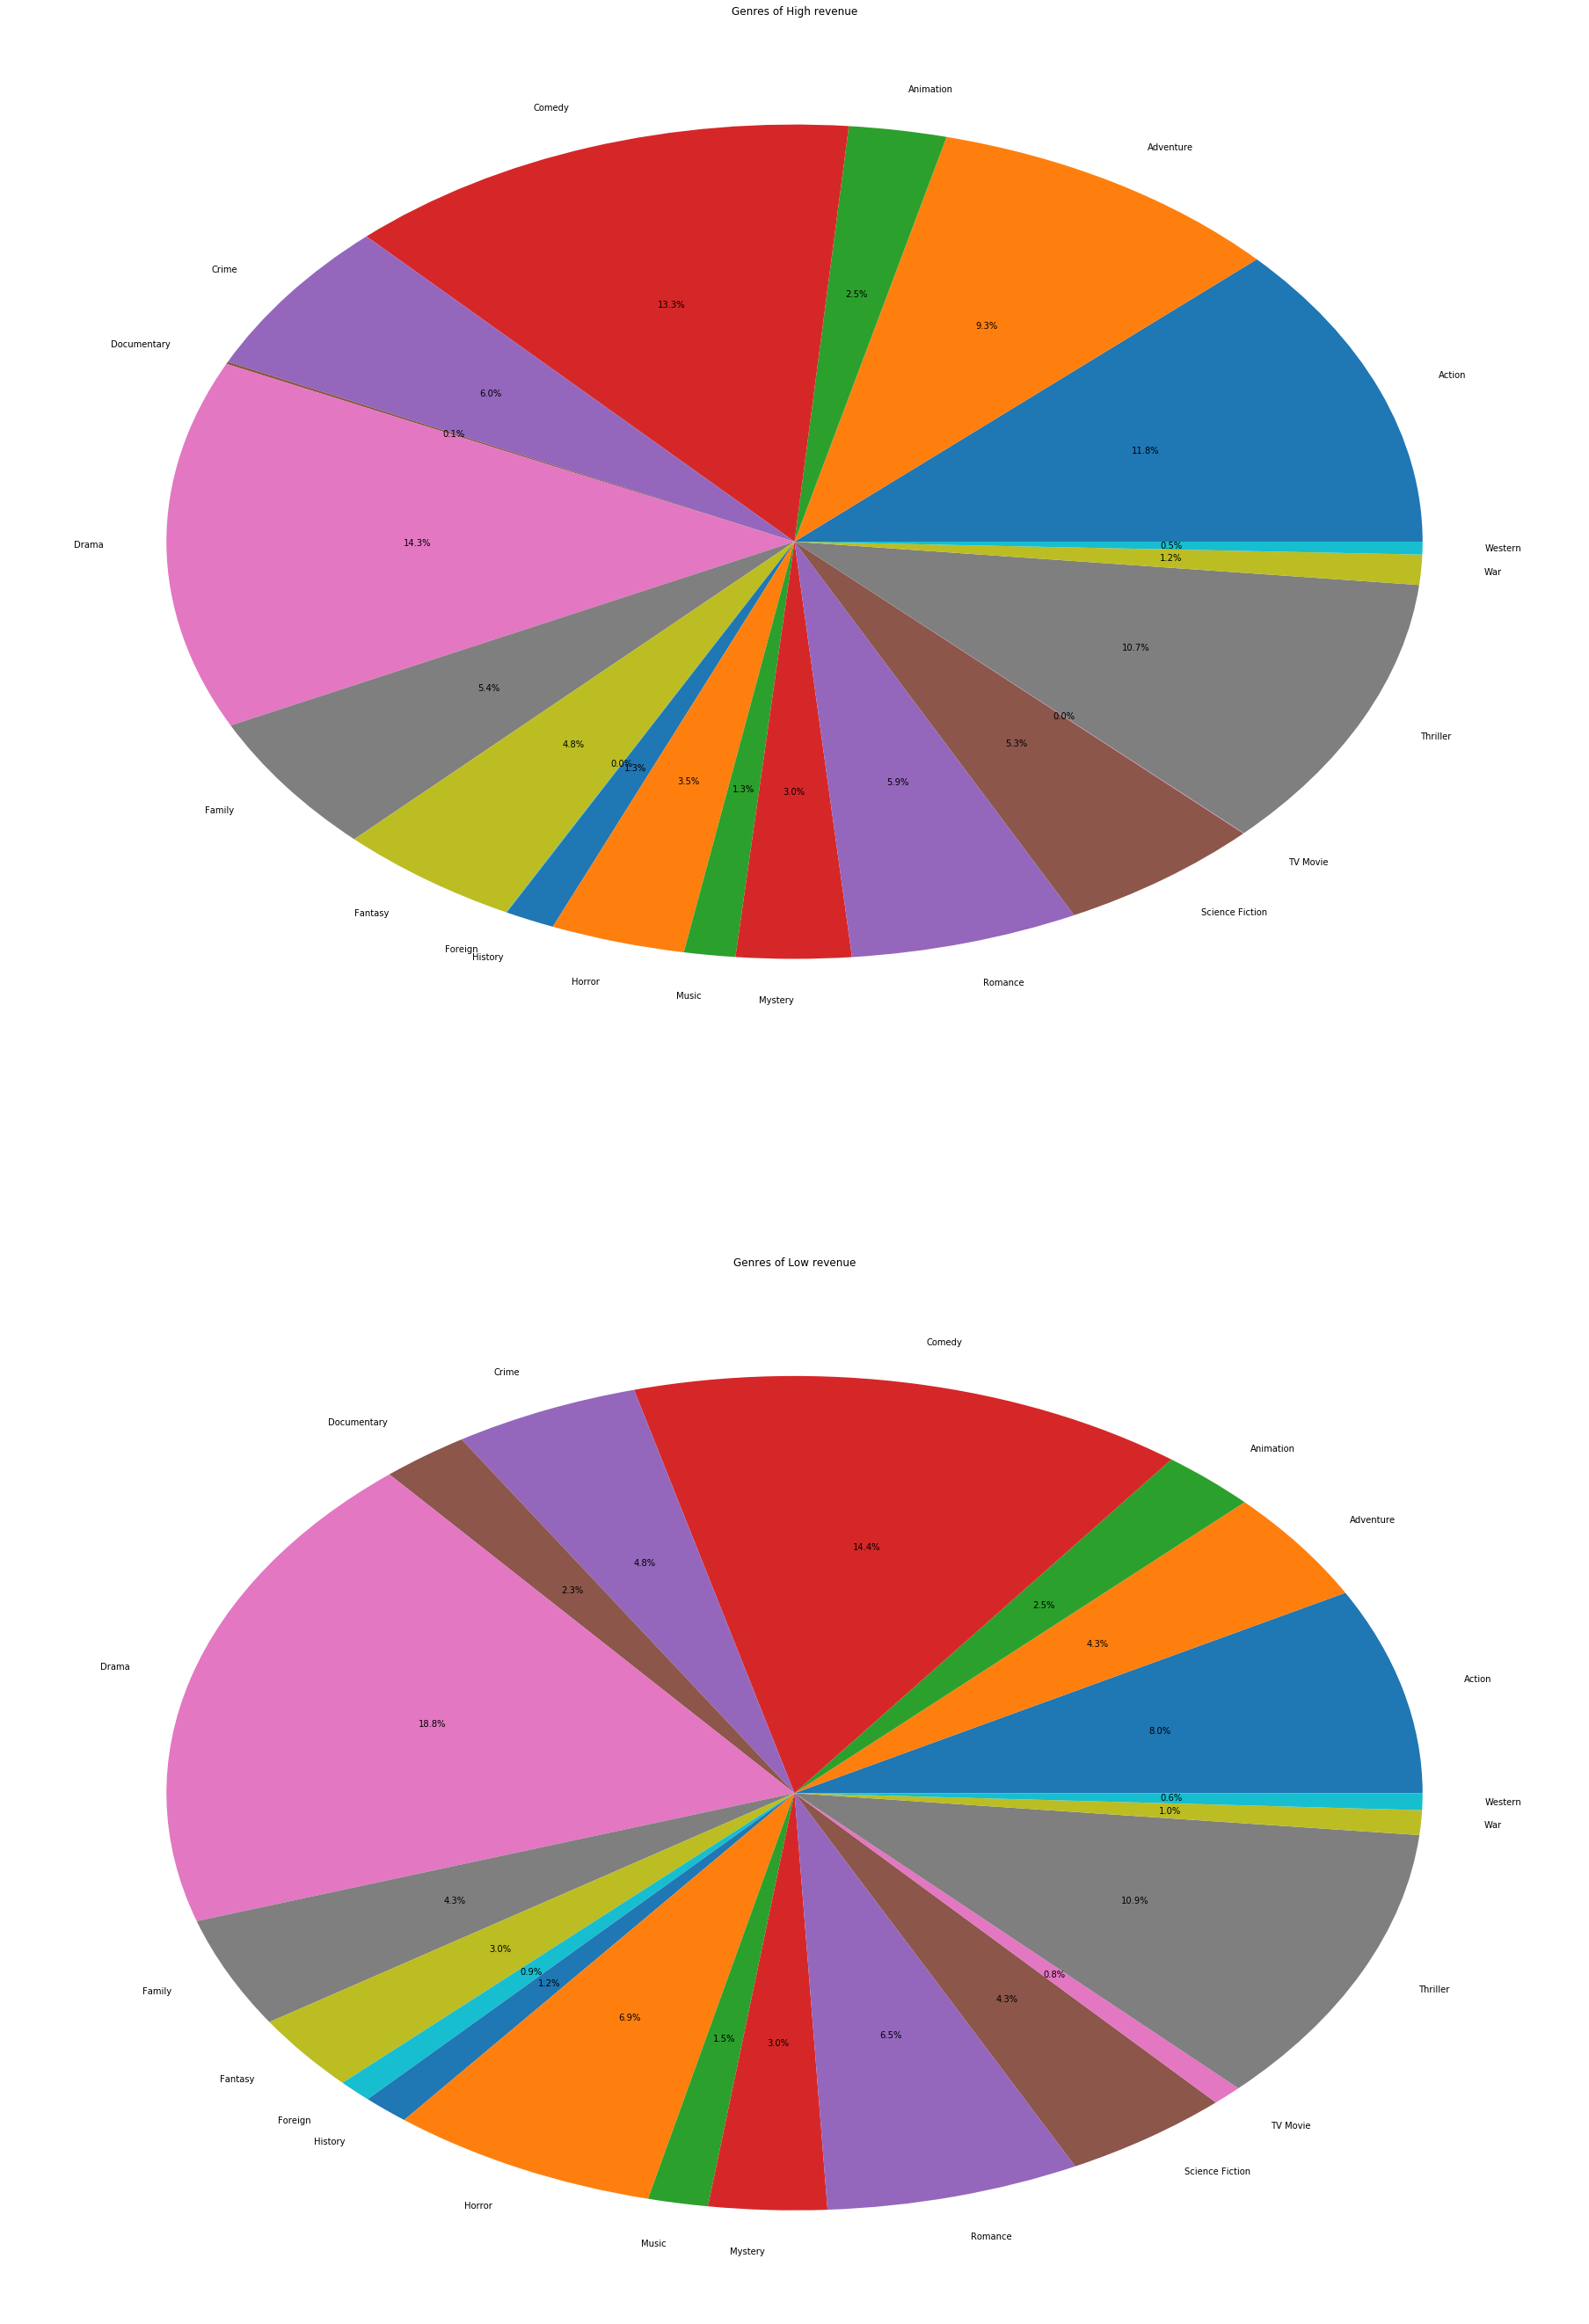

In [42]:
f, axes = plt.subplots(2,1, figsize=(32,48))
h=q2_high.groupby('genres')['genres'].count()
ax=axes[0]
h.plot(kind='pie',autopct='%1.1f%%',ax=ax,title='Genres of High revenue')
ax.set(ylabel='');
l=q2_low.groupby('genres')['genres'].count()
ax=axes[1]
l.plot(kind='pie',autopct='%1.1f%%',ax=ax,title='Genres of Low revenue')
ax.set(ylabel='');

From the plot, we can tell that Documentary is surely not the type that can earn money. Action and adventure are the types that people more willing to take the money out of their pocket.

<a id='conclusions'></a>
## Conclusions
#### Limitations:
><p>1.While cleaning the data, I drop around 1% of the data due to missing data point.</p>
><p>2.Since one movie can have multiple genres, so I classified them into evey genres they have.</p>
><p>3.There are a lot of columns in both budget and	revenue, which might cause the results confusing.</p>


#### Summary and Conclusions
><p>1. From the pie chart in question one, we can tell that from 2000-2015 adventure and fantasy type of movies are popular among the public. Also, adventrue movies are always popular from 1960 till 2015. And animation movies are popular in 60s, 80s and 90s.</p>
><p>2.In question two, the scatter plots show that with a better popularity may lead to better income, and so is the average score. And those movies with higher revenue used their budget more effeciently, which might also resulting the better income.</p>
3.<p>From the pie plot in question two, we can tell that Documentary is surely not the type that can earn money. Action and adventure are the types that people more willing to take the money out of their pocket.</p>


In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0